Iteration 1/100 | Best Distance: 263.87093709128584
Iteration 2/100 | Best Distance: 263.87093709128584
Iteration 3/100 | Best Distance: 263.87093709128584
Iteration 4/100 | Best Distance: 263.87093709128584
Iteration 5/100 | Best Distance: 263.87093709128584
Iteration 6/100 | Best Distance: 263.87093709128584
Iteration 7/100 | Best Distance: 263.87093709128584
Iteration 8/100 | Best Distance: 262.25946355461133
Iteration 9/100 | Best Distance: 262.25946355461133
Iteration 10/100 | Best Distance: 262.25946355461133
Iteration 11/100 | Best Distance: 262.25946355461133
Iteration 12/100 | Best Distance: 262.25946355461133
Iteration 13/100 | Best Distance: 262.25946355461133
Iteration 14/100 | Best Distance: 262.25946355461133
Iteration 15/100 | Best Distance: 262.25946355461133
Iteration 16/100 | Best Distance: 262.25946355461133
Iteration 17/100 | Best Distance: 262.25946355461133
Iteration 18/100 | Best Distance: 262.25946355461133
Iteration 19/100 | Best Distance: 262.25946355461133
It

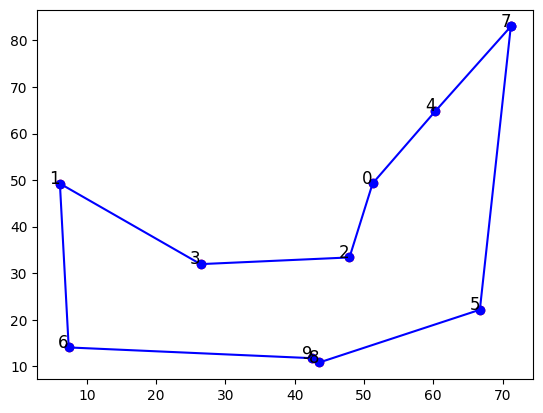

In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Step 1: Define the Problem (Cities with Coordinates)
def generate_cities(num_cities):
    cities = np.random.rand(num_cities, 2) * 100  # Random coordinates between (0, 100)
    return cities

def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

# Step 2: Initialize Parameters
class ACO:
    def __init__(self, cities, num_ants, alpha, beta, rho, iterations, initial_pheromone=1.0):
        self.cities = cities
        self.num_cities = len(cities)
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.iterations = iterations
        self.initial_pheromone = initial_pheromone
        self.pheromone = np.ones((self.num_cities, self.num_cities)) * initial_pheromone
        self.distances = np.array([[distance(c1, c2) for c1 in cities] for c2 in cities])
        self.best_route = None
        self.best_distance = float('inf')

    def run(self):
        for iteration in range(self.iterations):
            all_routes = []
            all_distances = []

            # Step 3: Construct Solutions (Ants Construct Routes)
            for ant in range(self.num_ants):
                route, route_distance = self.construct_solution()
                all_routes.append(route)
                all_distances.append(route_distance)

                # Update the best solution found
                if route_distance < self.best_distance:
                    self.best_route = route
                    self.best_distance = route_distance

            # Step 4: Update Pheromones
            self.update_pheromones(all_routes, all_distances)

            print(f"Iteration {iteration+1}/{self.iterations} | Best Distance: {self.best_distance}")

        return self.best_route, self.best_distance

    def construct_solution(self):
        route = [random.randint(0, self.num_cities - 1)]  # Start at a random city
        visited = set(route)
        total_distance = 0

        while len(visited) < self.num_cities:
            current_city = route[-1]
            next_city = self.choose_next_city(current_city, visited)
            route.append(next_city)
            visited.add(next_city)
            total_distance += self.distances[current_city, next_city]

        # Complete the cycle
        total_distance += self.distances[route[-1], route[0]]
        return route, total_distance

    def choose_next_city(self, current_city, visited):
        probabilities = []
        for next_city in range(self.num_cities):
            if next_city not in visited:
                pheromone = self.pheromone[current_city, next_city] ** self.alpha
                heuristic = (1.0 / self.distances[current_city, next_city]) ** self.beta
                probability = pheromone * heuristic
                probabilities.append(probability)
            else:
                probabilities.append(0)

        # Normalize the probabilities
        total_prob = sum(probabilities)
        probabilities = [p / total_prob for p in probabilities]
        return np.random.choice(range(self.num_cities), p=probabilities)

    def update_pheromones(self, all_routes, all_distances):
        # Evaporate pheromones
        self.pheromone *= (1 - self.rho)

        # Deposit pheromones based on solution quality
        for route, route_distance in zip(all_routes, all_distances):
            pheromone_deposit = 1.0 / route_distance
            for i in range(len(route) - 1):
                self.pheromone[route[i], route[i+1]] += pheromone_deposit
            self.pheromone[route[-1], route[0]] += pheromone_deposit

# Step 3: Initialize the problem and run ACO
def plot_route(cities, route):
    plt.scatter(cities[:, 0], cities[:, 1], c='red')
    for i, city in enumerate(cities):
        plt.text(city[0], city[1], f'{i}', fontsize=12, ha='right')

    route_coords = np.array([cities[city] for city in route])
    route_coords = np.vstack([route_coords, route_coords[0]])  # Return to start city
    plt.plot(route_coords[:, 0], route_coords[:, 1], 'b-', marker='o')

    plt.show()

if __name__ == "__main__":
    num_cities = 10
    cities = generate_cities(num_cities)

    aco = ACO(cities=cities,
              num_ants=20,
              alpha=1.0,   # Pheromone importance
              beta=5.0,    # Heuristic importance (distance)
              rho=0.5,     # Pheromone evaporation rate
              iterations=100)

    best_route, best_distance = aco.run()

    print("Best route:", best_route)
    print("Best distance:", best_distance)

    # Step 6: Output the best solution
    plot_route(cities, best_route)
